In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# train and test datasets
train_csv = pd.read_csv('../input/application_train.csv.zip', compression='infer')
test_csv = pd.read_csv('../input/application_test.csv.zip', compression='infer')

# balance information
credit_card_balance = pd.read_csv('../input/credit_card_balance.csv.zip', compression='infer')
bureau_balance = pd.read_csv('../input/bureau_balance.csv.zip', compression='infer')
cash_balance = pd.read_csv('../input/POS_CASH_balance.csv.zip', compression='infer')

# history data
installments = pd.read_csv('../input/installments_payments.csv.zip', compression='infer')
previous = pd.read_csv('../input/previous_application.csv.zip', compression='infer')

In [19]:
bureau = pd.read_csv('../input/bureau.csv.zip', compression='infer')

In [27]:
bureau.pivot_table(index='SK_ID_CURR', columns='CREDIT_ACTIVE', values='AMT_CREDIT_SUM', aggfunc='sum').fillna(0)

CREDIT_ACTIVE,Active,Bad debt,Closed,Sold
SK_ID_CURR,,,,
100001,884025.000,0.0,569340.000,0.0
100002,481988.565,0.0,383067.000,0.0
100003,810000.000,0.0,207400.500,0.0
100004,0.000,0.0,189037.800,0.0
100005,598626.000,0.0,58500.000,0.0
100007,0.000,0.0,146250.000,0.0
100008,267606.000,0.0,200839.500,0.0
100009,1527561.000,0.0,3273250.500,0.0
100010,675000.000,0.0,315000.000,0.0


In [3]:
# removing 5 rows
train_csv = train_csv[train_csv['NAME_INCOME_TYPE'] != 'Maternity leave']

# removing 4 rows
train_csv = train_csv[train_csv['NAME_FAMILY_STATUS'] != 'Unknown']

# removing 2 rows
train_csv = train_csv[train_csv['CODE_GENDER'] != 'XNA']

In [4]:
# assigning X,y
X = pd.get_dummies(train_csv.drop('TARGET', axis=1), dummy_na=True)
y = train_csv['TARGET']

# assigning test
test = pd.get_dummies(test_csv, dummy_na=True)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [6]:
gboost_baseline = GradientBoostingClassifier(n_estimators=2000)

In [7]:
gboost_baseline.fit(X_train.fillna(0), y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=2000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [8]:
predictions = gboost_baseline.predict(X_test.fillna(0))
pred_prob = gboost_baseline.predict_proba(X_test.fillna(0))

In [9]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.92      1.00      0.96     93389
          1       0.43      0.04      0.07      8086

avg / total       0.88      0.92      0.89    101475



In [10]:
print(confusion_matrix(y_test, predictions))

[[92978   411]
 [ 7780   306]]


In [11]:
roc_auc_score(y_test, pred_prob[:,1])

0.7530792473770156

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1])

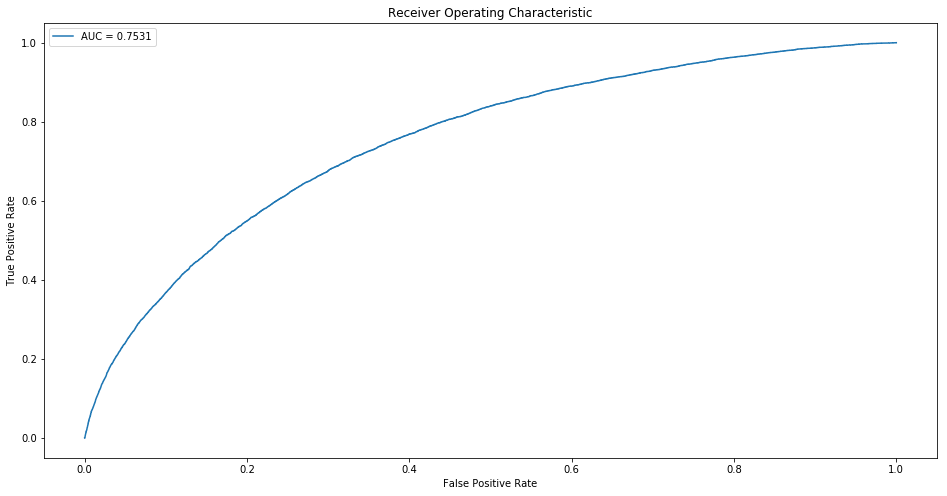

In [31]:
plt.figure(figsize=(16,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, label='AUC = %0.4f'% roc_auc_score(y_test, pred_prob[:,1]))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='upper left')

In [14]:
pred_sub = gboost_baseline.predict_proba(test.fillna(0))

submission = pd.DataFrame()
submission['TARGET'] = pred_sub[:,1]
submission.index = test['SK_ID_CURR']

In [15]:
submission.to_csv('gboost.csv')

In [16]:
summary = pd.Series(gboost_baseline.feature_importances_)
summary.index = X.columns

In [17]:
summary.sort_values(ascending=False, inplace=True)

In [18]:
summary

EXT_SOURCE_2                           0.114129
DAYS_BIRTH                             0.065520
SK_ID_CURR                             0.054741
DAYS_REGISTRATION                      0.046271
AMT_ANNUITY                            0.041258
EXT_SOURCE_3                           0.036990
DAYS_ID_PUBLISH                        0.036084
AMT_CREDIT                             0.033529
DAYS_EMPLOYED                          0.029561
EXT_SOURCE_1                           0.027252
AMT_INCOME_TOTAL                       0.026693
DAYS_LAST_PHONE_CHANGE                 0.026393
AMT_GOODS_PRICE                        0.021514
HOUR_APPR_PROCESS_START                0.016727
REGION_POPULATION_RELATIVE             0.015090
OWN_CAR_AGE                            0.013074
AMT_REQ_CREDIT_BUREAU_YEAR             0.012248
DEF_30_CNT_SOCIAL_CIRCLE               0.010049
AMT_REQ_CREDIT_BUREAU_QRT              0.008480
TOTALAREA_MODE                         0.008206
OBS_60_CNT_SOCIAL_CIRCLE               0